In [2]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<b>NOTE: </b>Please go to "Cell" and click "Run All" before starting this chapter. The raw code for this jupyter notebook is by default hidden for easier reading. Please ensure it is hidden for the first session.
The code to produce machine learning outputs are included in the next chapters.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

## Table of Contents
<a href="#What-is-Machine-Learning?"><font size="+0.5">What is Machine Learning?</font></a>
* What is Learning?

<a href="#Types-of-Machine-Learning"><font size="+0.5">Types of Machine Learning</font></a>
* Supervised Learning
* Unsupervised Learning
* Semi-Supervised Learning
* Reinforcement Learning

<a href="#Learning-From-Data"><font size="+0.5">Learning From Data</font></a>
* Learning a Linear Function
* Models in Machine Learning


<a href="#Regression-and-Classification"><font size="+0.5">Regression and Classification</font></a>
* Model Flexibility
* Variance and Bias in Models
* Evaluating Accuracy
* Model Robustness
* Model Overfitting

<a href="#Machine-Learning-Workflows"><font size="+0.5">Machine Learning Workflows</font></a>
* Description of ML Workflows

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from scipy.interpolate import Rbf

%matplotlib inline

# remove future warnings
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

---

<center><h1><font size=6> Chapter 0 </font></h1></center>
<center><h1><font size=7> Machine Learning Basics </font></h1></center>

*By Jonathon Mellor and Daniel Lewis*
## Aim


This first session will provide some context for machine learning (ML), including what it is, how machines learn, why ML is useful, and the different approaches to machine learning.

## Learning Objectives

By the end of the session, participants will be able to:
* Describe what is meant by machine learning and how machines learn.
* Discuss the application of different types of machine learning.
* Understand the design process of machine learning applications.
* Practically apply machine learning workflows in case studies.

# What is Machine Learning? 

> "[a field] of study that gives computers the ability to learn without being explicity programmed"
>
> **- Arthur Samuel, 1959**

Arthur Samuel was an American pioneer of artificial intelligence who coined the term machine learning in 1959.

'Without being explicitly programmed' distinguishes between algorithms where a human explicitly codes every step to achieve a goal, from approaches where computers themselves learn the necessary steps using the data. This is done by identifying the patterns, structures and regularities that exist in the data. The patterns and characteristics discovered allow predictions to be made.

## What is Learning?

> <font size="+2">learn</font>  
> *verb*  
>
> Gain or acquire knowledge of or skill in (something) by study, experience, or being taught.

Learning covers activities which, were a human to do it, would require some amount of intelligence, problem solving or critical thought.

One of the key benefits is that machines can often find patterns or relationships in data that would take a human much longer to discover. They are also systematic and don't get bored or lose focus when confronted with monotonous tasks like searching through vast amounts of data. In this sense, what we are refering to as learning or intelligence is quite narrowly focussed.

Humans too learn through data, our brains interpret information and we derive patterns also past experience which allows us to make predictions.


<div class="alert alert-block alert-success">
<b><font size=3> Maths<font> </b> 
<p>
Machine learning is fundementally a mathematical construct and it would be difficult to progress without touching on some maths. However, a high level of mathematical ability is not required to understand the intuition and basics of the subject. All the concepts in this course will be explained, with equations also included for those who are interested and hoping to understand at a deeper level. By understanding the maths you will understand what the models are doing better, but the classes provided by the relevant libraries will do do all the mathematical "heavy lifting" for us.
</p>
</div>

---
# Types of Machine Learning

This course will tend towards a discussion of supervised machine learning, however, it is possible to think of machine learning approaches as belonging to one of several *families* of approach, *loosely*:

* **Supervised Learning**
* Unsupervised Learning
* Semi-Supervised Learning
* Reinforcement Learning

The aim of this course is to mostly focus on supervised learning, but we'll touch on these other 'types', which aren't necessarily mutually exclusive.

## Supervised Learning

Learning a function that relates an input to an output using training examples given as input-output pairs.

The input into a function is $X$ and the output is $Y$, $Y$ is the *target* or *label* of the data. This helps the machine learning algorithm find the best parameters of a function $f(X)$ which relates $X$ to $Y$. This is used for a data set where the target/variable of interest is not missing, so we can train a model to predict from the features to the label.

The aim of supervised learning is usually to create a generalisable model that allows for 'correct' prediction of an outcome in unseen data.

Supervised learning is often split by task - predicting a continuous output or a categorical output - regression and classification approaches accordingly.

You may be familiar with the equation $y = m\times x + c$ from school. Using a straight line to predict the value of one variable based on another is a basic form of regression, a supervised learning method.

<img src="../../images/suplearn.png"  width="600" height="600" alt="Example images of a regression and classification problem solution.">

One example of supervised learning was completed by the Data Science Campus, where they predicted what type of financial institution a company was based on characteristics of their buisness. More information about this project can be found [here](https://datasciencecampus.ons.gov.uk/finbins-granular-classification-of-the-uks-financial-sector/).

## Unsupervised Learning

Unsupervised learning learns the patterns, structures or regularities in a dataset ($X$) without reference to, or in absence of, target data ($Y$), some applications include:
* Clustering: splitting or partioning a data into groups according to similarity.
* Latent variable models: discovering 'hidden' constructs based on observed data.
* Dimension reduction: reducing the number of features in a dataset, while retaining as much information as possible.
* Outlier detection: finding unusual data values.

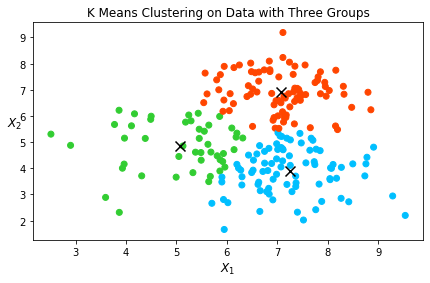

In [3]:
# Make 3 2D clusters
clust1 = np.random.multivariate_normal(mean = [5,5], cov = [[1,0],[0,1]], size = 40)
clust2 = np.random.multivariate_normal(mean = [7,7], cov = [[0.5,0],[0,0.5]], size = 75)
clust3 = np.random.multivariate_normal(mean = [7,4], cov = [[0.75,0],[0,0.75]], size = 100)

clust = np.row_stack([clust1, clust2, clust3])
# perform kmeans
kmeans = KMeans(n_clusters=3).fit(clust)

# plot the points
kmeans_fig, ax = plt.subplots(figsize = (7,4))
ax.scatter(clust[:,0], clust[:,1], color = np.vectorize({0:'orangered',1:'deepskyblue',2:'limegreen'}.get)(kmeans.predict(clust)))
ax.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker='x', color='k', s = 100)

ax.set_title("K Means Clustering on Data with Three Groups")
ax.set_xlabel("$X_{1}$", fontsize = 12)
ax.set_ylabel("$X_{2} $ ", fontsize = 12, rotation = 0);

In this graph, a k-means classifier has allocated data points to 1 of 3 categories according to $X_{1}$ and $X_{2}$. This is unsupervised as nothing was previously known about which class a given data point might belong to. This is an example of clustering.

## Semi-Supervised Learning

Falls between supervised and unsupervised learning. Usually takes the form of a lot of unlabelled data and a little labelled data.

Semi-supervised learning often performs better than discarding labels and searching for structure using unsupervised methods, or restricting the dataset to just labelled examples and building a supervised learning model based on limited data.

Labelled data often helps identify the existence of particular outcomes or groups, while the unlablled data helps establish boundaries for those labels.

These tasks exist because often unlabelled data is 'cheap', while it costs time, money and resource to actually generate labels for data. 

A good example of semi-supervised learning comes from Facebook, which stores vast amounts of unlabelled photos, but can make accurate predictions about who is in an unlabelled photo from a few instances of 'tagged' photos.

## Reinforcement Learning

Reinforcement means rewarding a machine learning model such that over time it can learn the set of actions that maximise that reward. Good reinforcement learning algorithms are able to trade-off short-term rewards for long-term gain.

Typically, the machine learning model is embodied as an agent taking actions in an environment, that agent's performance is evaluated by an interpreter which issues a reward if the agent is determined to have acted optimally.

Reinforcement has a lot of applications in areas like automation and games. Google DeepMind's AlphaGo is an example of a sophisticated reinforcement learning algorithm that can reach superhuman levels of gameplay at Chess and Go by playing itself, and rewarding play that results in winning outcomes.


---
# Learning From Data

The below discussion of machine learning from data is viewed from a lense of *supervised learning* where we make predictions based on information learned from our data.

In order to construct machine learning models, which are mathematical constructs, we make a range of assumptions about our data that simplify the problem.

Firstly, we assume that there is some kind of *systematic* information in a dataset about an outcome of interest. This means we believe there to be an existing pattern in the data, we just don't quite know what it is exactly.
* Often this is verified using exploratory data analysis (EDA).

Secondly, we choose a model that relates the systematic information in a dataset to an outcome of interest in mathematical terms. In this context, a model is the algorithm that learns the patterns within the data. We want to choose a model that can best match and therefore find the patterns we think the data holds.
* Predicting a continuous outcome, or membership of a category usually resolves to:
$$Y = f(X) + \epsilon$$

We assume that our data outcome $Y$, can be described by a pattern $f(X)$, which is dependent on $X$, and some quantity of error or random noise $\epsilon$.

$X$ and $Y$ can be multiple dimensions, not just necessarily vectors of numbers. 

You will see code often writted with the form `X` and `y`, this is to illustrate that `X` is a matrix, and `y` is a vector. You can think of the matrix `X` as tabular data in this course, as each record represents a row in the matrix and each feature a column.

Thirdly, we pass examples from the data set to the model, which attempts to 'learn' the best specification of $f(X)$ for a given model.
* Known as 'training' or 'fitting' the model.

This provides us with a trained **model** with which we can make predictions, we refer to these predictions as $\hat{Y}$ (y hat).

<div class="alert alert-block alert-warning">
<b><font size=3> Note:<font> </b> 
<p>
Systematic information is a pattern or structure in data associated with some outcome of interest. By this we mean that the data has an order to it, that there are regularities apparent in the data. Usually this resolves to data having an association of in some form with the outcome we are interested in.
</p>
</div>

Choosing a model is akin to specifying the form that you think the function $f(X)$ takes, there are numerous models to choose from and generally the 'true' functional form of $f(X)$ is unknown. The goal of many ML problems is to construct a model as near to the 'true' form of $f(X)$ as possible.

Learning is really then using data to best construct a model. We want to build a model for a purpose, it is important to not build a model for the sake of it.



## Learning a Linear Function

One of the simplest candidates for $f(X)$ is a linear relationship, fitted using the least squares method, something we will discuss in more detail in Chapter 3.

Here, the computer has learned a linear function for $Y$ on $X$, so given a new value for $x$ we can make a prediction for the value of $y$.

A linear relationship is a way of describing something you already know, a straight line graph. You would know it as $$ y = mx + c $$ Where $y$ would be the function $f(x)$.

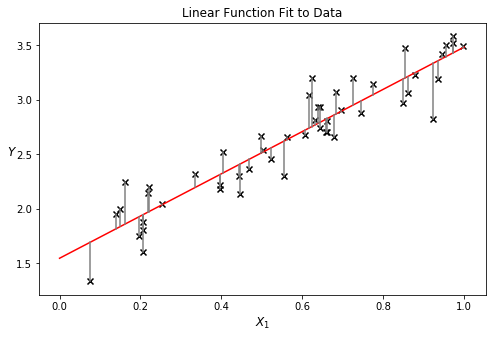

In [4]:
fig, ax = plt.subplots(figsize = (8,5))

# Create scattered data
x = np.random.random(50)
y = 1.5 + 2*x + np.random.normal(scale = 0.2, size=50)

# Get best-fit line
coefs = np.polyfit(x, y, deg = 1)
xfit = np.linspace(0, 1, 2)
yfit = coefs[1] + coefs[0] * xfit

# Plot
ax.scatter(x,y, marker = 'x', color = 'k')
ax.plot(xfit, yfit, color = 'r')

# plot errors
def error_line(x, y, coefs):
    xs = [x, x]
    ys = [y, coefs[1] + coefs[0] * x]
    return xs, ys
errs = [ax.plot(*error_line(x, y, coefs), color = '0.5') for x, y in zip(x,y)]

ax.set_title("Linear Function Fit to Data")
ax.set_xlabel("$X_{1}$", fontsize = 12)
ax.set_ylabel("$Y $", fontsize = 12, rotation = 0);

Least squares minimises the sum of the squares of the residuals (the grey lines) for a given set of data. This then is the best fitting linear model for these data.

The equation that the linear function learnt is given by: $$ \hat{Y} =  1.5242 * X_1 + 1.9565$$

However, when a linear function is not a good representation of the true underlying relationship it may be a 'bad' model overall. As we discussed, we should pick the model that will represent the pattern that the data has.

In general, a problem will likely involve more than one input variable $X$, in which case you can imagine fitting a plane or a 'hyperplane' in three or more dimensions. This can be hard to visualise, but the principle remains the same, we want to minimise the difference between the model we have selected and the true values of the data. 

## Models in Machine Learning

> "All models are wrong but some are useful."
>
> **- George Box, 1978**

Models simplify and idealise reality, a model cannot fully describe a complex interacting system, however a model may be useful enough for a particular application, like predicting the price of a house.

All models are wrong, but often some models are better than others, and we can search for and evaluate the better ones. This is a core strategy in machine learning, trying find a model that works well for your particular problem.

Even though models are wrong, the intent is always that they tell us something about reality, to predict a quantity with some degree of precision, provide evidence for an action or decision, or give a summary. 


### Note

The intention with machine learning is not to reproduce reality, so much as it is to create a useful model - something that allows us to make reasonable predictions which can then be used.

Usually, we think of a prediction as a combination of reducible error and irreducible error. 

* The reducible error is the difference between the predictions and true values due to the the difference between our model choice and the true relationship between $X$ and $Y$. By choosing the most appropriate model, that can be fit to the data and therefore most closely resemble $f(X)$, we minimise the reducable error, hopefully to zero. Choosing a 'bad' model, that does not reflect the true value of $f(X)$, will give us a high reducible error.

* The errors $\epsilon$ are the parts of the prediction of $Y$ that cannot be predicted using $X$ and so are 'irreducible', this may account for things like errors in measurement - random errors (chance deviations), as well as missing or omitted variables, or other things that are unmeasureable, or just the natural limitation of how related our data is. 

<div class="alert alert-block alert-warning">
<b><font size=3>Key Point<font> </b> 
<p>
Generalisability is important to Machine Learning, ultimately the intent is to say something useful about the real world with as little bias and error as possible and as much accuracy and precision. We want to be able to make predictions as accurately as possible based on the data we have.
</p>
</div>


---
# Regression and Classification

In the context of supervised learning, we tend to divide models into regression and classification approaches. This is based on the kind of outcome we are seeking to predict.

* Regression models predict a continuous variable, such as a floating point number.
    * Classically, a value is assumed to be unbounded and can take any value.
    * Other models account for bounded outcomes (e.g. positive values only) or discrete values (e.g. counts)
* Classification models predict a categorical variable.
    * Binary classifier (e.g. 1 or 0, True or False, Present or Absent etc.)
    * Multinomial classifier (More than 2 categories)

Usually, regression models predict the expected value of a 'target' variable based on 'features' - the input data.

Classification methods predict the class membership 'label' of a data point based on the 'features' of the data set. 

These two concepts are useful as they allow us to make predictions about unknowns using information that we already have. An example of regression would be predicting the price of a house based on the characteristics that we know about the house: such as the number of rooms it has, the square footage, the post code and more. Classification on the other hand could be a program that predicts whether or not an individual is going to default on their loans, which may include factors such as their credit rating, salary, size of loans and more. 

Supervised learning requires a data set containing the true values of variables we want to be able to predict. The models then attempt to learn the relationship between the thing we want to predict, and the information we have available to use that prediction. The job of the data scientist is to therefore to prepare the data adequately, choose the best model, with appropriate parameters, then measure how well the model succeeds. 

## Model Flexibility

One way of separating models is between linear (straight line) and non-linear (not straight line) models.

A linear model is relatively inflexible as it only permits the modelling of a linear relationship, with only a gradient and y-intercept being able to be fitted. Other models are more flexible if they allow for more complicated functions to be fit.

Non-linear models do offer more predictive power, able to model data with more complicated structures. In general, more flexible models are harder to interpret and can be more challenging to find a good solution for, they can also be more prone to something called overfitting, which is bad news for prediction. We will discuss overfitting shortly.

### Flexibility of Two Models

A simple comparison of an inflexible model (linear model) and a flexible model (non-linear [support vector](https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/) regressor).

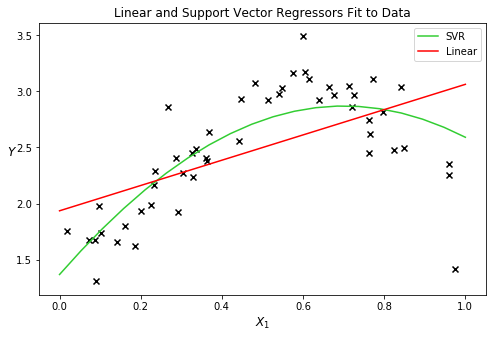

In [5]:
svr_fig, ax = plt.subplots(figsize = (8,5))

# Create scattered data
x = np.random.random(50)
y = 1.5 + 2*x + 5*x**2 + -7*x**3 + np.random.normal(scale = 0.2, size=50)

svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1).fit(x.reshape((-1,1)),y)
pred_svr = np.column_stack([np.linspace(0,1,20), svr.predict(np.linspace(0,1,20).reshape((-1,1)))])

# Plot
ax.scatter(x,y, marker = 'x', color = 'k')
ax.plot(pred_svr[:,0], pred_svr[:,1], color = 'limegreen', label="SVR")

# Get best-fit line
coefs = np.polyfit(x, y, deg = 1)
xfit = np.linspace(0, 1, 2)
yfit = coefs[1] + coefs[0] * xfit

ax.plot(xfit, yfit, color = 'r', label="Linear")

ax.set_title("Linear and Support Vector Regressors Fit to Data")
ax.set_xlabel("$X_{1}$", fontsize = 12)
ax.legend()
ax.set_ylabel("$Y  $", fontsize = 12, rotation = 0);

Although not perfect, the more flexible support vector regressor here allows for a non-linear fit which better models the curved relationship between $X$ and $Y$. The linear model is a straight line graph, whereas the support vector regressor is shaped to the data in a curved fashion.

Inflexible models, like linear models, generally perform well with small amounts of training data as they don't need much data to learn the linear fit. More flexible models tend to require more data to produce a good fit in general, instead of just being able to fit to the specifics of the training data.

On the other hand, if the 'true' function between your inputs and your output is complex, then you'll likely need a lot of training data and a highly flexible model to capture this complex underlying pattern and produce an accurate model.

## Variance and Bias in Models

The **variance** with regards to machine learning models is different than for a statistical distribution.

The **variance** in a model is a measure of how different the estimate of a function would look for different sets of training data. A model with low variance would produce a very similar shape regardless of the particularities of the training data you gave it, whereas a model with high variance might predict quite different shapes of functions depending on the training data set. Some randomly sampled training data may contain high values, some low, this difference will impact the model dependent on it's variance.

The **bias** in a model is a measure of how different a given functional form is from the 'true' relationship in reality - if the model deviates significantly from the real-world relationship it will be hard to produce an accurate prediction.

<div class="alert alert-block alert-warning">
<b><font size=3>Key Point<font> </b> 
<p>
Generally, more flexible methods result in less bias but more variance, hence there is a _bias-variance_ tradeoff in machine learning.</p>
<p>
The challenge in machine learning is finding a method which minimises both variance and bias as much as possible, potentially while also accounting for interpretability and computational factors.
</p>
</div>


### Model Variance

Five linear and five [random forest models](https://towardsdatascience.com/an-implementation-and-explanation-of-the-random-forest-in-python-77bf308a9b76) were trained on different training subsets of the original data.

We will not go into detail on Random Forest models this course. They are a type of model which produces a range of descision trees from subsets of the data and makes a prediction based on all the trees.

In this case, the linear model has low bias and low variance. It has low variance because different sets of the training data produce similar fits. Similarly it has low bias because the 'true' shape is linear. In reality it is unlikely to be this simple.

Note the slight variance in the fit of the five linear models results from each model being trained on 5 different random subsets of the same data.

The Random Forest models have higher variance as there is a greater difference between the five models. This can be seen clearly as for many values of $X$ they predict different $Y$'s. In this specific case the models also have higher bias, but because they are more flexible they are in general likely to be lower bias than the linear model for other problems.

High variance is similar to the butterfly effect, where even relatively small changes in training data can lead to big changes in the shape of a model and hence in the predictions made.

If the model is "too" well fit to the specifics of the data it is trained on this is called "overfitting", something we will discuss more shortly.

Data that is highly dimensional, meaning there are many features, can lead to high variance as the model struggles to deal with the dimensionality. It will give weight to dimensions that are irrelevant or have little predictive value. Feature selection can be useful here.

<div class="alert alert-block alert-warning">
<b><font size=3>Key Point<font> </b> 
<p>
In general, a model must be flexible to minimise bias, but not so flexible that it is too sensitive to different sets of training data.
</p>
</div>


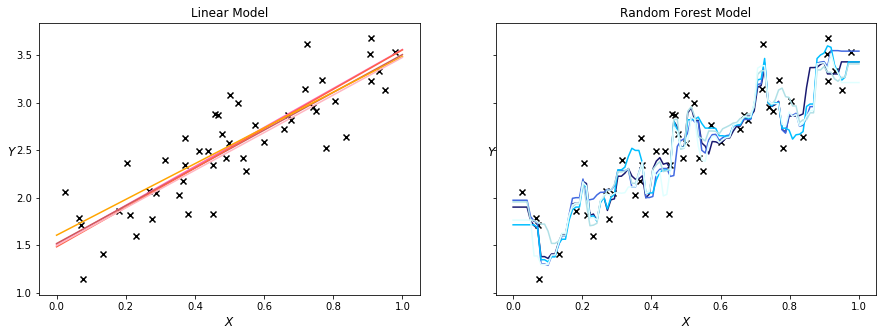

In [6]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (15,5), sharex = True, sharey = True)

np.random.seed(7)

# Create scattered data
x = np.random.random(50)
y = 1.5 + 2*x + np.random.normal(scale = 0.3, size=50)

# Plot
ax1.scatter(x,y, marker = 'x', color = 'k')
ax2.scatter(x,y, marker = 'x', color = 'k')

colors = {0:'hotpink', 1:'indianred', 2:'tomato', 3:'orange', 4:'lightpink'}
colors2 = {0:'midnightblue',1:'royalblue',2:'deepskyblue',3:'powderblue',4:'lightcyan'}

for i in range(5):
    # sample for 80% of the data.
    sample_ind = np.random.choice(range(50),size=40, replace=False)

    # Get best-fit line
    coefs = np.polyfit(x[sample_ind], y[sample_ind], deg = 1)
    xfit = np.linspace(0, 1, 2)
    yfit = coefs[1] + coefs[0] * xfit

    ax1.plot(xfit, yfit, color = colors[i])
    
    model = RandomForestRegressor().fit(x[sample_ind].reshape((-1,1)),y[sample_ind])
    xfit = np.linspace(0, 1, 100)
    yfit = model.predict(xfit.reshape((-1,1)))
    
    ax2.plot(xfit, yfit, color = colors2[i])

    ax1.set_xlabel("$X$", fontsize = 12)
ax1.set_ylabel("$Y  $", fontsize = 12, rotation = 0)

ax2.set_xlabel("$X$", fontsize = 12)
ax2.set_ylabel("$Y  $", fontsize = 12, rotation = 0)

ax1.set_title('Linear Model')
ax2.set_title('Random Forest Model');

## Evaluating Accuracy

Measures of accuracy are how you evaluate the performance of a given model, and ultimately make a decision as to which (if any) model you will use to solve your problem. Generally, measures of accuracy aim to assess how close a particular model specification came to perfect predictions.

In the _regression setting_ the mean squared error (MSE) is often used - this captures the difference between observed and predicted values (the residual) and takes the average of the squared residuals.

In the _classification setting_, accuracy is usually a case of comparing your predicted classes with the observed classes, and seeing how many you got right and how many you got wrong. This can yield a number of statistics related to the predictive power of your model.

Model evaluation will be discussed in more detail with regards to regression and classification in Chapters 3 and 4.

## Model Robustness

Assessing the accuracy of a model using data that you have trained the model on will often give you an overly optimistic picture of it's accuracy. 

The objective of building a machine learning model is generally so that it can be used **to predict** values in **unseen data**. 

Sometimes models that appear to work *really well on training data*, work *less well in reality* as the model has 'overfit' to the peculiarities of the training data, and hence does a poor job on new or unseen data (the next section discussed overfitting in more detail). 

> We want our models to be able to *predict well for data that it was not trained on*. We call models that can do this well "generalisible".

To provide insight into the true performance of a model, the usual practice is to 'hold back' a proportion of the whole dataset. This means we have one dataset for **training**, and a data set for **testing** (the remainder).

The data processing and modelling is carried out on the training data, and the *training accuracy* is a guide for the quality of the model. 

The trained model can then be evaluated against the test data, which has gone through the same data processing as the training data. 

The **test accuracy** is a better indicator of the generalisability of the model and how it will perform on **real** data.

### Model Overfitting

Overfitting is the training of a model too specifically to the training data set. Our model learns the quirks and characteristics of the training data, including random error and patterns not representative of all the data.

This affects models of high variance as they are sensitive to the specifics of a training set.

Overfitting means that a model will do well to predict data in the original training set, but be potentially *very bad at predicting values for new data*.

Here two [thin-plate spline models](https://www.mailman.columbia.edu/research/population-health-methods/thin-plate-spline-regression) have been fit with different parameters (you don't need to understand the specifics of the models).

The blue model shows a *reasonable, approximate fit* for the data that will likely *generalise* well.

The orange model is overfitting to the training data. The orange model fits the *training data better* than the blue model, with an Mean Squared Error far lower, **however**, on the *test* data the orange model *under performs*. 

This is because the orange model is **overfit** to the training data, and hence doesn't generalise well to the *unseen test data*.

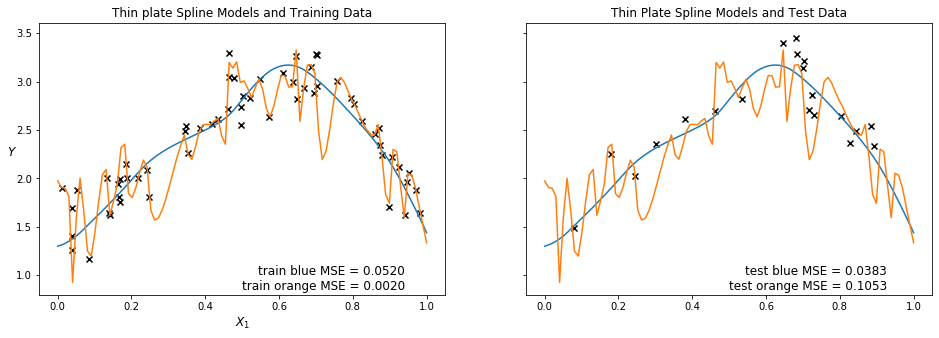

In [7]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (16,5), sharex = True, sharey=True)

np.random.seed(9)

# Create training scattered data
x = np.random.random(60)
y = 1.5 + 2*x + 5*x**2 + -7*x**3 + np.random.normal(scale = 0.2, size=60)

model_sm = Rbf(x,y, function = 'thin-plate', smooth = 0.1)
model_overfit = Rbf(x,y, function = 'thin-plate', smooth = 0.0000002)

# Plot
ax1.scatter(x,y, marker = 'x', color = 'k')
ax1.plot(np.linspace(0,1,100), list(map(model_sm,np.linspace(0,1,100))))
ax1.plot(np.linspace(0,1,100), list(map(model_overfit,np.linspace(0,1,100))))

ax1.set_xlabel("$X_{1}$", fontsize = 12)
ax1.set_ylabel("$Y $", fontsize = 12, rotation = 0)

# Create test scattered data
tx = np.random.random(20)
ty = 1.5 + 2*tx + 5*tx**2 + -7*tx**3 + np.random.normal(scale = 0.2, size=20)

# Plot
ax2.scatter(tx,ty, marker = 'x', color = 'k')
ax2.plot(np.linspace(0,1,100), list(map(model_sm,np.linspace(0,1,100))))
ax2.plot(np.linspace(0,1,100), list(map(model_overfit,np.linspace(0,1,100))))

def mse(x, y, model):
    y_hat = np.array([model(i) for i in x])
    return np.mean((y-y_hat)**2)

train_mse_sm = mse(x, y, model_sm)
train_mse_over = mse(x, y, model_overfit)

ax1.text(0.544,1.0,f"train blue MSE = {train_mse_sm:.4f}", fontsize = 12)
ax1.text(0.5,0.85,f"train orange MSE = {train_mse_over:.4f}", fontsize = 12)
ax1.set_title("Thin plate Spline Models and Training Data")

test_mse_sm = mse(tx, ty, model_sm)
test_mse_over = mse(tx, ty, model_overfit)

ax2.set_title("Thin Plate Spline Models and Test Data")
ax2.text(0.544,1.0,f"test blue MSE = {test_mse_sm:.4f}", fontsize = 12)
ax2.text(0.5,0.85,f"test orange MSE = {test_mse_over:.4f}", fontsize = 12);

<div class="alert alert-block alert-warning">
<b><font size=3>Key Point<font> </b> 
<p>
Variance, bias, generalisability and overfitting are highly overlapping concepts and the distinctions can therefore be confusing. However, what we need to remember is that we should pick a model that is complex enough to model the data, but not too complex that it overfits to the data is trained on.
</p>
</div>


## Summary

As you can see, there are a lot of considerations when specifying a machine learning model.

Perhaps the most important thing to get right in the first instance is 'why'?

* Start with the research question - what do you want to model?
* Explore some data and literature to shed light on the features of importance to the model.
* Start with simple models before doing anything model complex.
* Think critically when deciding how generalisable your model is - do your conclusions hold for the small world of the model only, or extend to the big world of reality?

---
# Machine Learning Workflows

The following exercises in this course will introduce aspects of machine learning in a structured way that approximates how a machine learning workflow might unfold in practice:

* Data Preparation
    * Cleaning; structuring; missing data imputation; data scaling; encoding; variable selection; training/testing data split.
* Model Specification
    * Choice of approach (e.g. linear regression vs. decision tree); cross-validation; regularisation; calibration/parameterisation.
* Evaluation
    * Measuring performance: How well does the model perform on the test set?

When designing our models we need to find the right balance of features we given to train with. We want to use just as many variables as we need and no more. Using a principle called Occam's Razor we much prefer simple models that make few assumptions about our data than more complicated options. 

Machine learning is a results led field, you are aiming to achieve the highest level of performance (given by your chosen accuracy/evaluation measure) possible. It is therefore not a static design process. The approach taken at the first instance of solving a problem is unlikely to be the best way. Each step in the machine learning workflow has different choices that will affect the performance of your model to varying degrees, these can each be changed and improved upon as you develop the model. This is called iterative development, where the model is designed, developed, tested and the process repeated. 

An example workflow process is given below. It is important to note that the model choice is impacted by how your data has been prepared, for example some models need certain scaling or cannot handle missing data.

<img src="../../images/workflow.png" width="600" height="500" alt="diagram showing the iterative development of machine learning models, going between the different steps in data preparation to model building and evaluation then back to data preparation">

# Conclusions

The application of Machine Learning is a challenging and involved process. This course is solely an introduction.

In the rest of the course we will focus on **supervised learning** and linear models as a general framework from which to develop more complicated models.

It will be up to you to practice and develop your skills subsequent to this introduction. The aim of the introduction is to give you an overview of the machine learning processes.

We will explore important topics in machine learning, but we won't explore any single topic in much detail. 

In the material that follows we will focus on the application of the standard machine learning tools available in python: **scikit-learn** (**`sklearn`**), coupled with **`pandas`** for handling data.

However, as we have discussed, machine learning is as much a conceptual undertaking as an applied one. No two problems are the same, and may require different approaches to derive the most appropriate model.

<div class="alert alert-block alert-success">
<b><font size="4"> Next Chapter: Data Preparation</font> </b> 
<p> 
The next chapter will discuss how to prepare data for machine learning model building. Preparing our data properly both allows us to use it and crucially can affect the performance of our models. The chapter will also explain different aspects of our data, such as type and go into more detail about how and why we split data for training and testing.
</p>
</div>